# Binärgewitter 2024

Tagline?
Let's take a look:
Zuerst müssen wir alle librarys importieren und Daten laden.

In [1]:
import pandas as pd
import calmap

In [2]:
podcasts = pd.read_csv("data/2024.csv", sep=",", index_col=1)
podcasts.index = pd.to_datetime(podcasts.index, format="%Y-%m-%d")

## Übersicht

Diese Jahr habe wir einige Sendungen veröffentlicht:

In [3]:
total_count = len(podcasts.index)
talk_count = len(podcasts[podcasts.Type == "Talk"].index)
westcoast_count = len(podcasts[podcasts.Type == "Westcoast"].index)

print(f"Talk:      {talk_count}")
print(f"Westcoast: {westcoast_count}")
print(f"Total:     {total_count}")

Talk:      22
Westcoast: 0
Total:     22


2024 haben wir 22 Sendungen gemacht! Das letzte mal als wir so viele Sendungen hatten war 2020.

## Binärgewitter Talk

In [4]:
distance_between_recordings = 52 / talk_count
print(f"Für Binärgewitter Talk sind das alle {distance_between_recordings} Wochen eine Sendung.")

Für Binärgewitter Talk sind das alle 2.3636363636363638 Wochen eine Sendung.


Wir machen ein Kopie und schauen uns nur die BGT Talk Sendungen genauer an.

In [5]:
talk = podcasts[podcasts.Type == "Talk"]
talk.drop(columns=['pfleidi', 'marc'])

,Name,Record Date,Type,Duration,ingo,l33tname,madmas,makefu
Release Date,,,,,,,,
2024-12-28,Binärgewitter Talk #350: Wir haben doch keine ...,2024-12-28,Talk,01:02:24,1,0,1,1
2024-12-11,Binärgewitter Talk #349: Blauhelm Browser,2024-11-10,Talk,02:23:12,1,1,1,1
2024-11-20,Binärgewitter Talk #348: Nicht mehr ganz Knusper,2024-11-19,Talk,02:02:42,1,1,1,0
2024-11-09,Binärgewitter Talk #347: DRM Brennstäbe,2024-11-08,Talk,01:15:08,1,0,1,1
2024-10-26,Binärgewitter Talk #346: Duoingo,2024-10-25,Talk,02:07:34,1,1,0,1
2024-10-14,Binärgewitter Talk #345: zu Ingos Studienzeiten,2024-10-13,Talk,02:35:36,1,1,1,1
2024-10-01,Binärgewitter Talk #344: Das Internet ist rund,2024-09-30,Talk,02:24:53,1,1,1,1
2024-09-12,Binärgewitter Talk #343: Alle 10 Jahre updaten,2024-09-10,Talk,02:26:24,1,1,1,1
2024-08-21,Binärgewitter Talk #342: Doppeldiskettenbrief,2024-08-19,Talk,02:24:04,0,1,1,1


### Sendungen pro Host:

In [6]:
ingo_count = talk["ingo"].sum()
l33tname_count = talk["l33tname"].sum()
madmas_count = talk["madmas"].sum()
makefu_count = talk["makefu"].sum()


print(f"ingo:     {ingo_count}")
print(f"l33tname: {l33tname_count}")
print(f"madmas:   {madmas_count}")
print(f"makefu:   {makefu_count}")

ingo:     20
l33tname: 18
madmas:   17
makefu:   20


In Prozen sind das:

In [7]:
print(f"ingo:      {ingo_count/talk_count:.0%}")
print(f"makefu:    {makefu_count/talk_count:.0%}")
print(f"l33tname:  {l33tname_count/talk_count:.0%}")
print(f"madmas:    {madmas_count/talk_count:.0%}")

ingo:      91%
makefu:    91%
l33tname:  82%
madmas:    77%


Niemand war fuer alle Sendungen hier, alle haben die eine oder andere Sendung verpasst.

### Duration

Da der feed jetzt eine duration pro Sendung angibt kann man jetzt auch interessante Auswertungen machen.

In [8]:
import datetime

convert_duration_to_sec = lambda v: (int(v.split(":")[0]) * 60*60) + (int(v.split(":")[1]) * 60) + int(v.split(":")[2])
talk['Duration_sec'] = talk['Duration'].transform(convert_duration_to_sec)

Unsere totale Sendezeit war diese Jahr:

In [9]:
total_sec = int(talk['Duration_sec'].sum())
str(datetime.timedelta(seconds=total_sec))

'2 days, 2:48:51'

Im Durchschnitt ist eine Sendung:

In [10]:
avg_sec = int(talk['Duration_sec'].mean())
str(datetime.timedelta(seconds=avg_sec))

'2:18:35'

Die kürzeste Sendung die wir diese Jahr gemacht haben:

In [11]:
shortes_episode = talk[talk['Duration_sec'] == talk['Duration_sec'].min()]
shortes_episode

,Name,Record Date,Type,Duration,ingo,l33tname,madmas,makefu,pfleidi,marc,Duration_sec
Release Date,,,,,,,,,,,
2024-12-28,Binärgewitter Talk #350: Wir haben doch keine ...,2024-12-28,Talk,01:02:24,1,0,1,1,0,0,3744


Und nicht zuletzt die längste Sendung:

In [12]:
longest_episode = talk[talk['Duration_sec'] == talk['Duration_sec'].max()]
longest_episode

,Name,Record Date,Type,Duration,ingo,l33tname,madmas,makefu,pfleidi,marc,Duration_sec
Release Date,,,,,,,,,,,
2024-05-10,Binärgewitter Talk #336: 18 Euro Mediathek,2024-05-09,Talk,03:21:20,1,1,1,1,0,0,12080


### Recording datum

Hier sehen wir, an welchen Tagen wir aufnehmen.

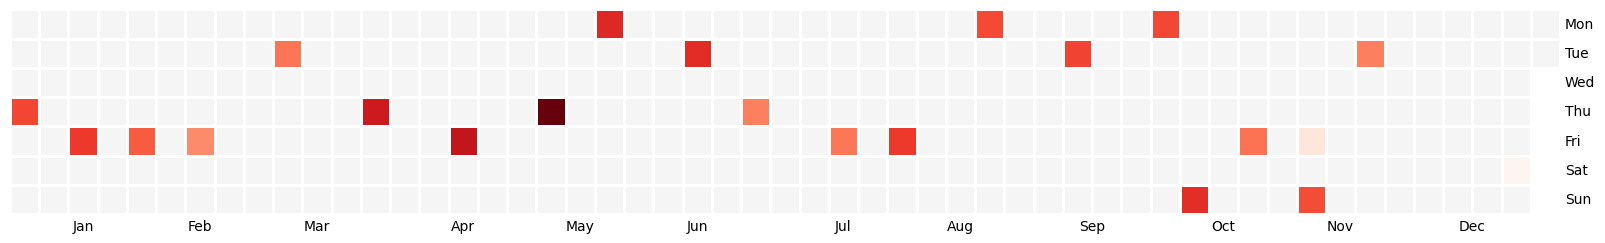

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20

release_date = talk
release_date.index = pd.to_datetime(release_date["Record Date"], format="%Y-%m-%d")
calmap.yearplot(release_date['Duration_sec']);